## Steps
- Clean up and categorize and do one-hot encoding
- Remove statistically insignificant outliers, low/redundant values (but take note what was removed) to reduce dataset size

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for nicer graphics
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
from collections import Counter

In [162]:
df = pd.read_csv("The Surprize App Survey.csv")
df["Timestamp"] = df["Timestamp"].apply(pd.to_datetime)
df = df.replace('5 (Strongly agree)','5')
df = df.replace('1 (Strongly disagree)','1')
df = df.drop(columns = ['Timestamp'])
for col in df.columns[1:]:
      df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors="ignore"))

In [163]:
df.shape

(525, 31)

In [164]:
df.head(2)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",Where do you typically get your FREE samples from? (Select all that apply),Which categories of FREE samples have you collected from the channels above? (Select all that apply),What are your typical reasons for turning down free samples? (Select all that apply),Where do you typically discover or learn about products? (Select all that apply),I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,I recommend products to my friends.,"Will you use this app, based on the description above?","You have answered ""Yes"" to the previous question, why? (Select all that apply)","You have answered ""No"" to the previous question, why? (Select all that apply)",Will you be willing to travel to collect your Prize?,How long are you willing to wait for the Prize to be delivered to your home?,"Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?","In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?",What are the categories of prizes would you like to receive from The Surprize App? (Select all that apply),Name,Gender,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?,Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :),Any questions or suggestions for us? (Give us your wildest ideas / comments)
0,3,Supermarkets / Supermarket Promoters;Retail St...,Food / Beverage;Beauty / Cosmetics;Skin Care;F...,The samples / products are not attractive;I’ll...,Receiving samples;Friends and Family;Google Se...,4,4,4,2,5,3,4,3,4.0,Yes,It’s delivered straight to my doorstep!;It’s h...,NaN,No,Up to 7 days,$2 - $3,More than 10 mins,Food / Beverage;Beauty / Cosmetics;Clothing / ...,NaN,Female,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000",NaN,NaN
1,3,Websites,Sports and Fitness;Electronics,It takes too much of my time and effort / too ...,Friends and Family;Google Search;Instagram,2,2,3,2,3,2,2,4,3.0,No,NaN,This app sounds too good to be true;Samples i ...,No,Doesn’t really matter since it’s free,I would not pay / I can wait,Will not do it at all!,Food / Beverage;Hair Care;Electronics,NaN,Male,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000",NaN,NaN


In [165]:
multichoice_cols = [col for col in df.columns if "(Select all that apply)" in col]
multichoice_cols

['Where do you typically get your FREE samples from? (Select all that apply)',
 'Which categories of FREE samples have you collected  from the channels above? (Select all that apply)',
 'What are your typical reasons for turning down free samples? (Select all that apply)',
 'Where do you typically discover or learn about products? (Select all that apply)',
 'You have answered "Yes" to the previous question, why? (Select all that apply)',
 'You have answered "No" to the previous question, why? (Select all that apply)',
 'What are the categories of prizes would you like to receive from The Surprize App? (Select all that apply)']

In [166]:
multichoice_short = ['Samples from where: ',
                    'What kind of samples collected: ',
                    'Why reject sample: ',
                    'How you learn about products: ',
                    'Why use Surprize: ',
                    'Why not use Surprize: ',
                    'What kinds of prizes: ']

In [167]:
for col,prefix in zip(multichoice_cols,multichoice_short):
    split_values = df[col].fillna("").astype(str).str.split(";")
    split_values_df = pd.DataFrame(list(split_values.apply(Counter)))
    split_values_df = split_values_df.fillna(0)
    split_values_df = split_values_df.add_prefix(prefix).astype('int32')
    df = df.drop(columns=col)
    df = pd.concat([df,split_values_df],axis=1)

In [168]:
# col = "Where do you typically get your FREE samples from? (Select all that apply)"
# split_values = df[col].fillna("").astype(str).str.split(";")
# split_values_df = pd.DataFrame(list(split_values.apply(Counter)))
# split_values_df = split_values_df.fillna(0)
# split_values_df = split_values_df.add_prefix('fds').astype('int32')
# split_values_df.head()


In [169]:
df.head(3)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,I recommend products to my friends.,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,How long are you willing to wait for the Prize to be delivered to your home?,"Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?","In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?",Name,Gender,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?,Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :),Any questions or suggestions for us? (Give us your wildest ideas / comments),Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Brand promotions / freebies from sellers online,Samples from where: Gym,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,Samples from where: Online shopping,Samples from where: Free gifts from Shoppee purchases,Samples from where: Mailbox,Samples from where: Mail box,Samples from where: Never,Samples from where: Buy stuff online then they give free,Samples from where: School events,Samples from where: online sellers,Samples from where: Offered upon purchase,Samples from where: When i purchase items,Samples from where: Never,Samples from where: Don’t really have the chance to get free samples,Samples from where: Interchange,Samples from where: National Day goodie bag,Samples from where: Nil,Samples from where: They come in e-commerce orders,Samples from where: Free samples from other purchases,Samples from where: Sports events goodie bags,Samples from where: Running races,Samples from where: Mailer,"Samples from where: Purchase of their products, and they give free samples?",Samples from where: Usually from online shopping. Samples sent w the items I purchased.,Samples from where: Beauty Salon,Samples from where: When I purchase something online (usually korean skin products would offer),Samples from where: Don’t accept,Samples from where: Sephora,Samples from where: Surprise Gifts upon purchase online,Samples from where: With delivered packages bought online,Samples from where: social media ads,Samples from where: When i order online and samples came w my order / gov,Samples from where: In my online orders,"Samples from where: Free samples from online sellers, sponsors of some event",Samples from where: Online stores buy stuff they will give!,Samples from where: Online shopping purchases,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of

In [170]:
### Remove redundant information

In [171]:
threshold = int(np.ceil(0.03*len(df)))
threshold

16

In [172]:
df.describe()

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,I recommend products to my friends.,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Brand promotions / freebies from sellers online,Samples from where: Gym,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,Samples from where: Online shopping,Samples from where: Free gifts from Shoppee purchases,Samples from where: Mailbox,Samples from where: Mail box,Samples from where: Never,Samples from where: Buy stuff online then they give free,Samples from where: School events,Samples from where: online sellers,Samples from where: Offered upon purchase,Samples from where: When i purchase items,Samples from where: Never,Samples from where: Don’t really have the chance to get free samples,Samples from where: Interchange,Samples from where: National Day goodie bag,Samples from where: Nil,Samples from where: They come in e-commerce orders,Samples from where: Free samples from other purchases,Samples from where: Sports events goodie bags,Samples from where: Running races,Samples from where: Mailer,"Samples from where: Purchase of their products, and they give free samples?",Samples from where: Usually from online shopping. Samples sent w the items I purchased.,Samples from where: Beauty Salon,Samples from where: When I purchase something online (usually korean skin products would offer),Samples from where: Don’t accept,Samples from where: Sephora,Samples from where: Surprise Gifts upon purchase online,Samples from where: With delivered packages bought online,Samples from where: social media ads,Samples from where: When i order online and samples came w my order / gov,Samples from where: In my online orders,"Samples from where: Free samples from online sellers, sponsors of some event",Samples from where: Online stores buy stuff they will give!,Samples from where: Online shopping purchases,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Never,What kind of samples collected: Baby Products,What kind of samples collected: Pet supplies,What kind of samples collected: Adult (+21),What kind of samples collected:,What kind of samples collected: Nil,What kind of samples collected: Detergent,"What kind of samples collected: Hair ties, keychains",Why reject sample: The samples / products are not attrac

In [173]:
df_sum = df.select_dtypes(include='number').sum()

In [174]:
df_sum_subset = df_sum[df_sum<30]

<AxesSubplot:>

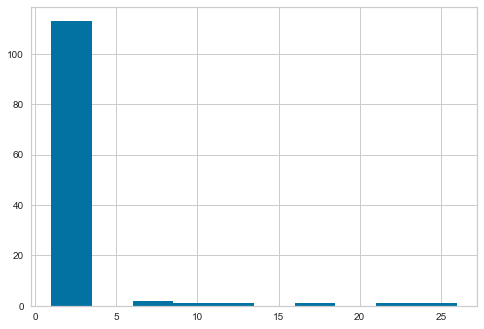

In [175]:
df_sum_subset.hist()

In [176]:
df_sum[df_sum<threshold].index

Index(['Samples from where: Brand promotions / freebies from sellers online',
       'Samples from where: Gym', 'Samples from where: Online shopping',
       'Samples from where: Free gifts from Shoppee purchases',
       'Samples from where: Mailbox', 'Samples from where: Mail box',
       'Samples from where: Never',
       'Samples from where: Buy stuff online then they give free ',
       'Samples from where: School events',
       'Samples from where: online sellers',
       ...
       'Why not use Surprize: Not sure what I will be receiving is something I would use. Then it’d be a waste to receive ',
       'Why not use Surprize: I dont like having a lot of stuff in my house',
       'What kinds of prizes: Doesn't matter',
       'What kinds of prizes: Toto and 4D ticket please',
       'What kinds of prizes: Everything, anything. Its free. Why not.',
       'What kinds of prizes: Nil',
       'What kinds of prizes: I knew it. Im not signing up for this app thanks.',
       'What

In [177]:
len(df_sum[df_sum<threshold])

117

In [178]:
df = df.drop(columns = df_sum[df_sum<threshold].index)
df.head(3)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,I recommend products to my friends.,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,How long are you willing to wait for the Prize to be delivered to your home?,"Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?","In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?",Name,Gender,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?,Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :),Any questions or suggestions for us? (Give us your wildest ideas / comments),Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you

In [179]:
df.shape

(525, 98)

In [180]:
multichoice_short

['Samples from where: ',
 'What kind of samples collected: ',
 'Why reject sample: ',
 'How you learn about products: ',
 'Why use Surprize: ',
 'Why not use Surprize: ',
 'What kinds of prizes: ']

In [181]:
[col.split(':')[1][1:] for col in df.columns if "Samples from where" in col]

['Supermarkets / Supermarket Promoters',
 'Retail Stores / Promoters',
 'Roadshows',
 'Websites',
 'Social Media Giveaways',
 'Mobile Apps',
 'Vending Machines']

In [182]:
sorted(list(df['How young are you?'].unique()))

['17 and below',
 '18 - 24',
 '25 - 34',
 '35 - 44',
 '45 - 54',
 '55 - 64',
 '65 and above']

In [183]:
split_criteria =['Gender','How young are you?','What is your marital status?','What level of education have you obtained?',
                 'What is your current employment status?','What is your annual income?']

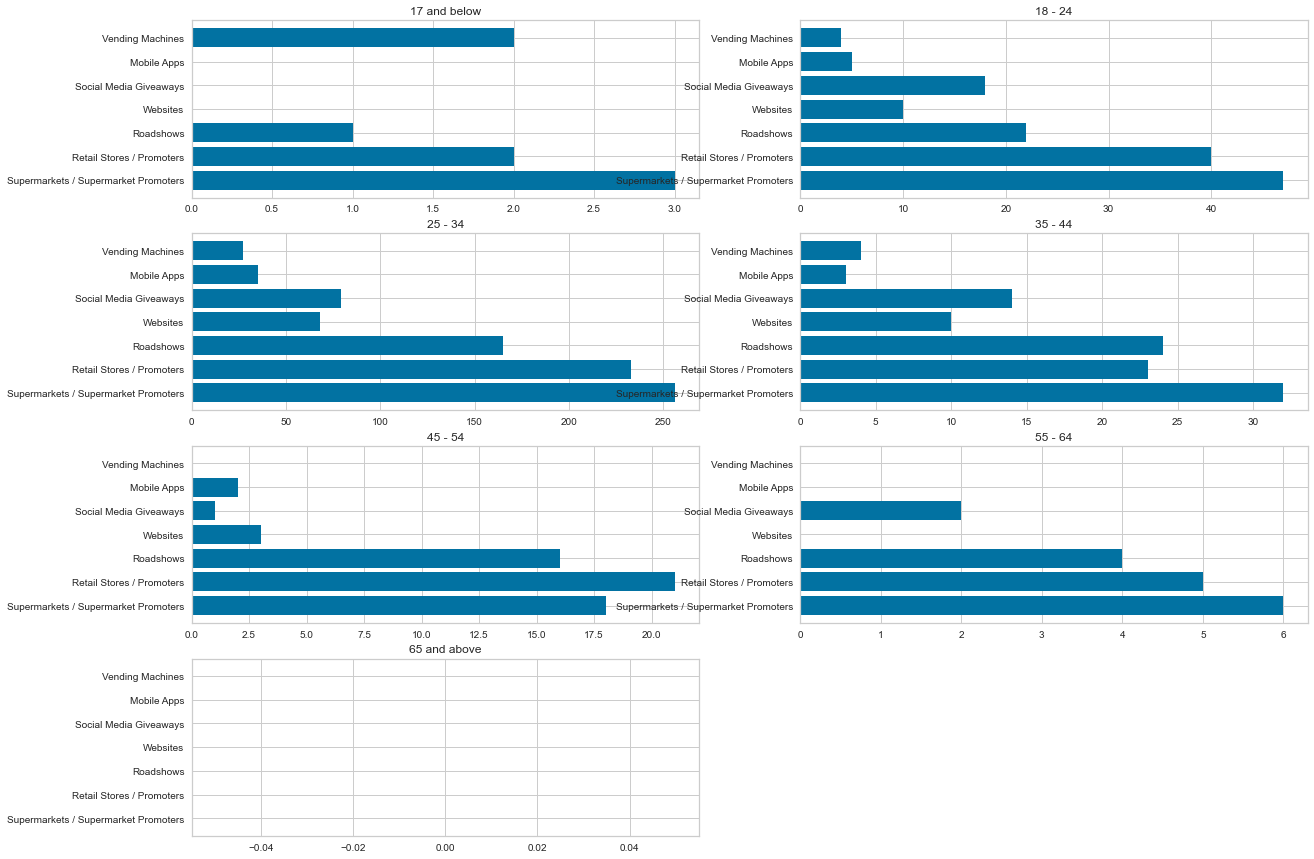

In [184]:
# (1) do for other questions, (2) find a nice way to 
split_on = 'How young are you?'
length = len(df[split_on].unique())
rows, cols = int(np.ceil(length/2)),2
fig = plt.figure(figsize=(20, 15))
ax = []
for entry in sorted(list(df[split_on].unique())):
    ax.append( fig.add_subplot(rows, cols, len(ax)+1) )
    df_temp = df.loc[df[split_on]==entry]
    qns_type = multichoice_short[0]
    ax[-1].barh([col.split(':')[1][1:] for col in df_temp.columns if qns_type in col],
             [df_temp[col].sum() for col in df_temp.columns if qns_type in col])
    ax[-1].set_title(entry)

https://stackoverflow.com/questions/47796264/how-to-create-a-grouped-bar-plot

17 and below
18 - 24
25 - 34
35 - 44
45 - 54
55 - 64
65 and above


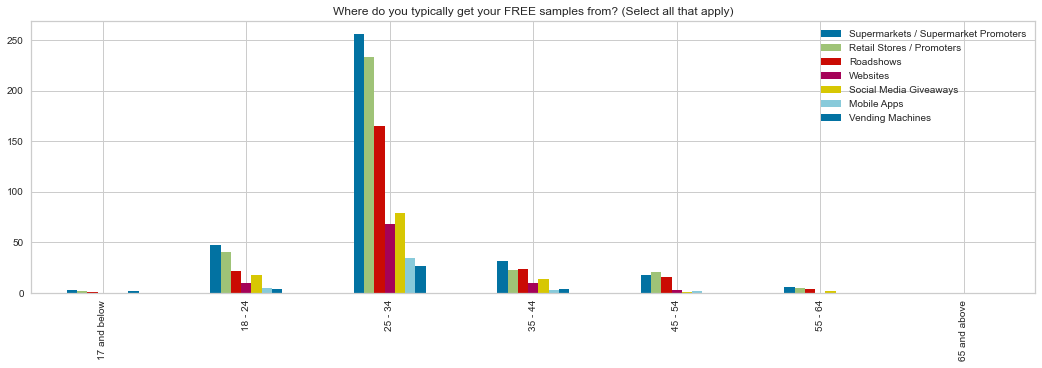

In [190]:
number = 0

qns_type = multichoice_short[number]
plot_df = pd.DataFrame()
for entry in sorted(list(df[split_on].unique())):
    print(entry)
    df_temp = df.loc[df[split_on]==entry] #all entries in the selected criterion
    series = pd.Series([df_temp[col].sum() for col in df_temp.columns if qns_type in col],
                    [col.split(':')[1][1:] for col in df_temp.columns if qns_type in col],
                   name=entry)
    plot_df = pd.concat([plot_df, series], axis=1)
plot_df.T.plot(kind='bar',figsize=(18,5),title=multichoice_cols[number])

plt.show()

In [187]:
plot_df

,17 and below,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 and above
Supermarkets / Supermarket Promoters,3,47,256,32,18,6,0
Retail Stores / Promoters,2,40,233,23,21,5,0
Roadshows,1,22,165,24,16,4,0
Websites,0,10,68,10,3,0,0
Social Media Giveaways,0,18,79,14,1,2,0
Mobile Apps,0,5,35,3,2,0,0
Vending Machines,2,4,27,4,0,0,0


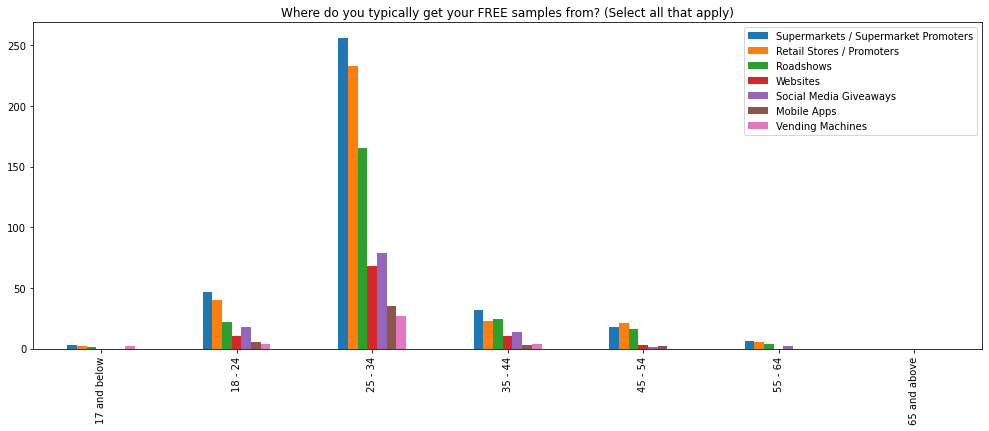

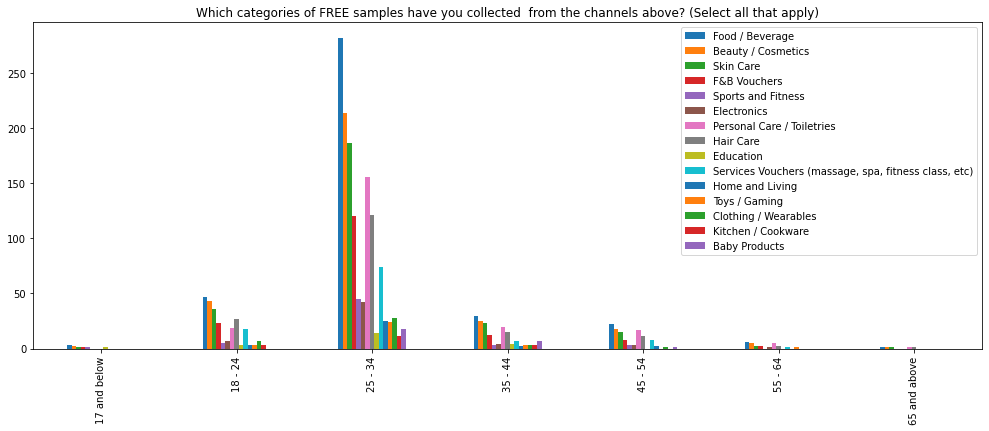

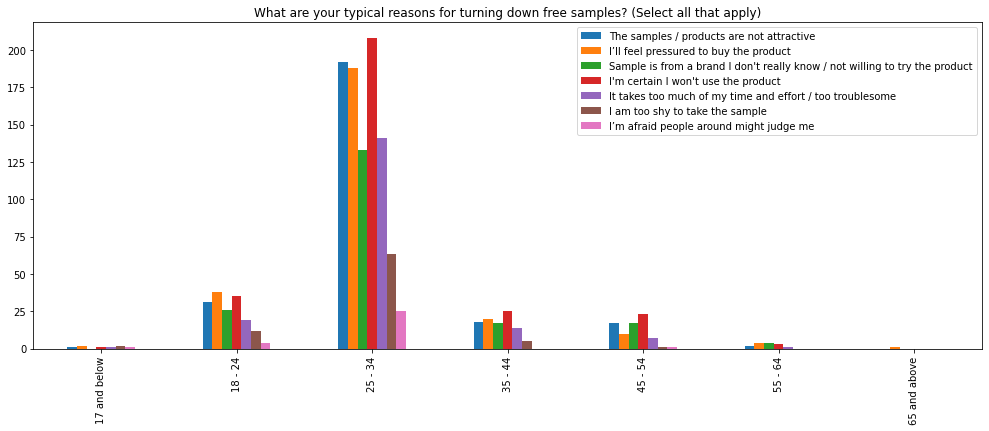

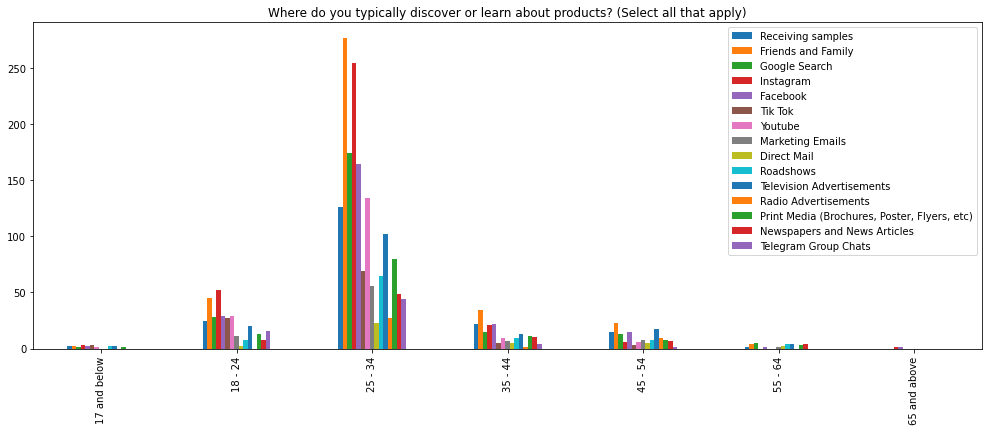

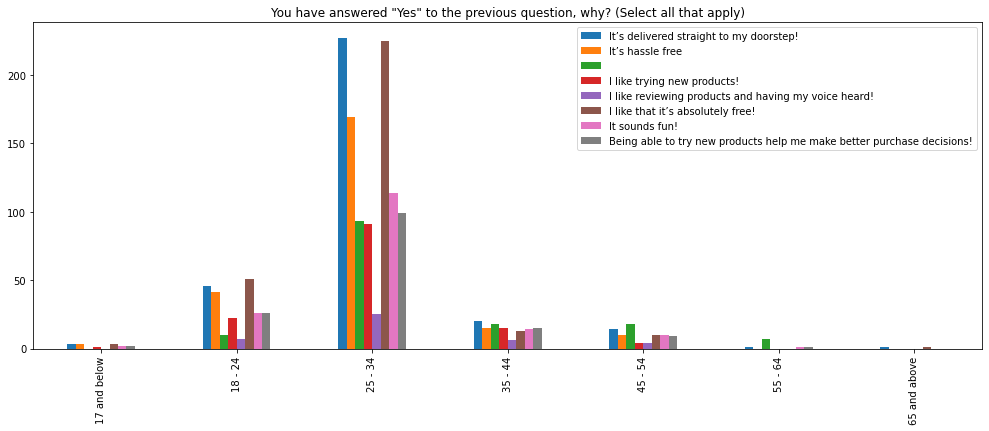

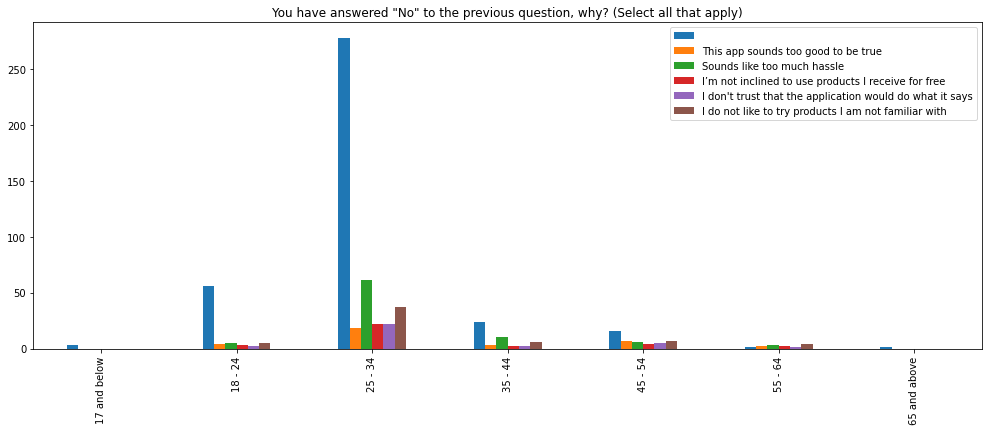

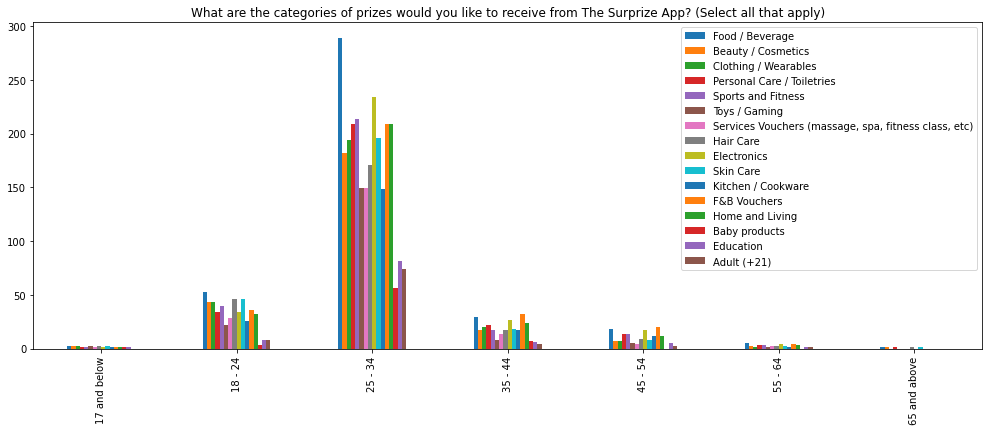

In [72]:
number = 1
split_on = "How young are you?"

for number in range(7):
    qns_type = multichoice_short[number]
    plot_df = pd.DataFrame()
    for entry in sorted(list(df[split_on].unique())):
        df_temp = df.loc[df[split_on]==entry] #all entries in the selected criterion
        series = pd.Series([df_temp[col].sum() for col in df_temp.columns if qns_type in col],
                        [col.split(':')[1][1:] for col in df_temp.columns if qns_type in col],
                       name=entry)
        plot_df = pd.concat([plot_df, series], axis=1)
    plot_df.T.plot(kind='bar',figsize=(17,6),title=multichoice_cols[number])

    plt.show()

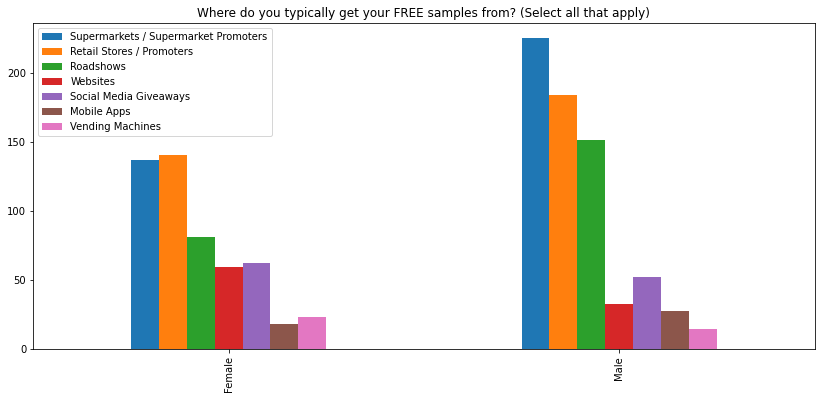

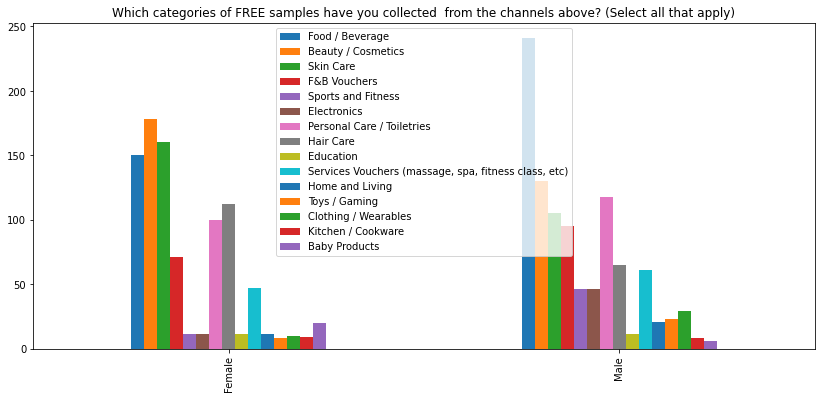

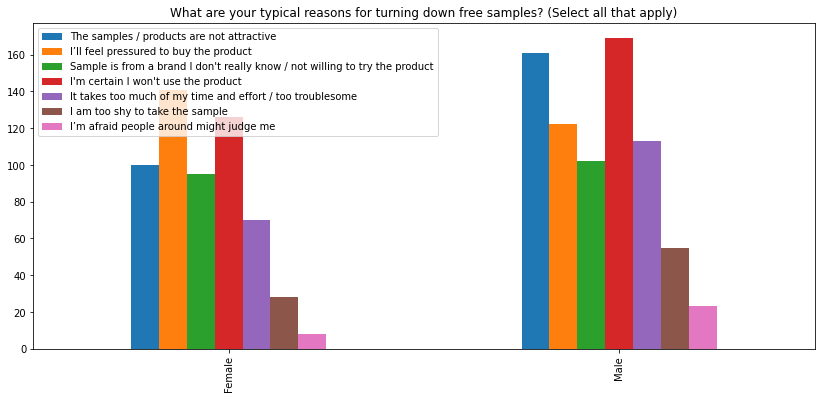

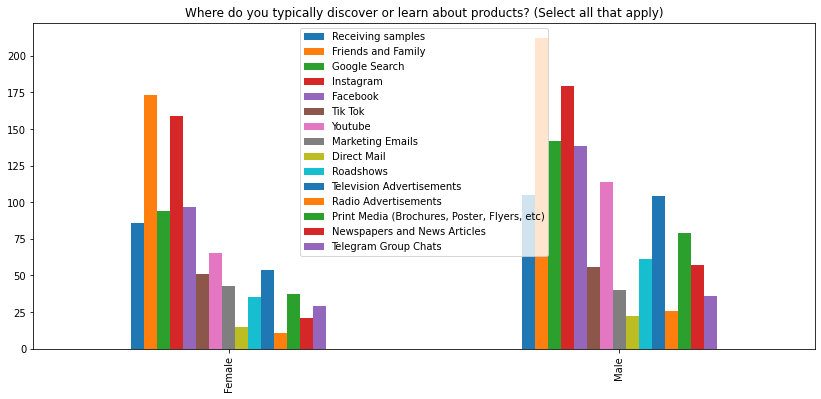

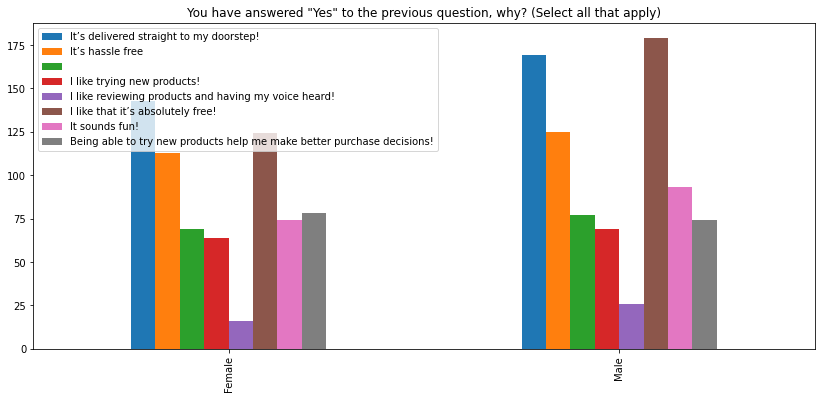

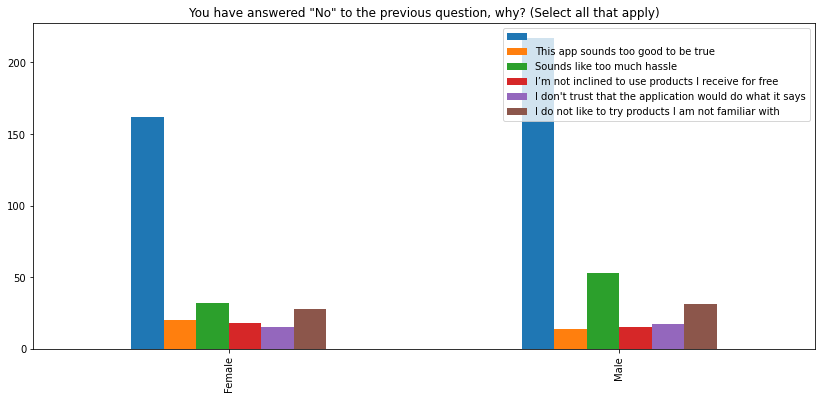

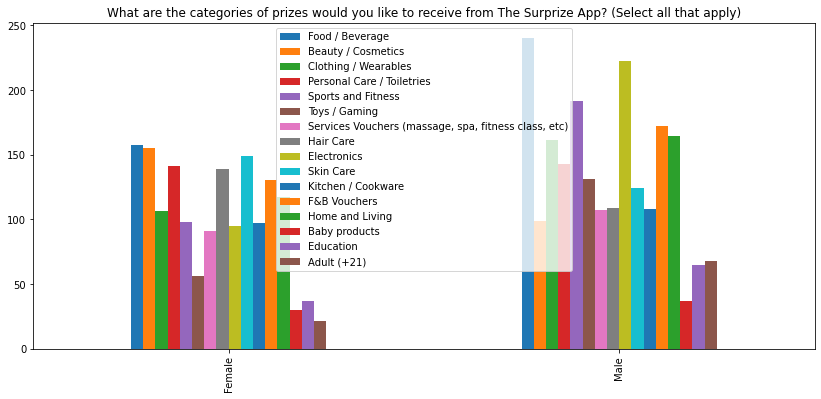

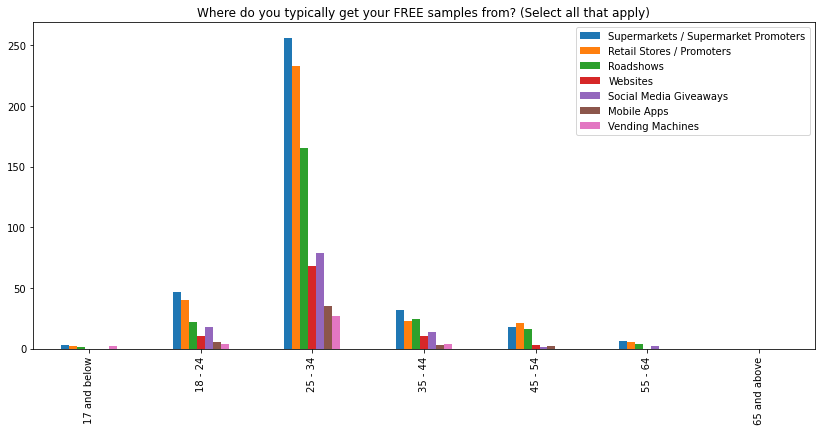

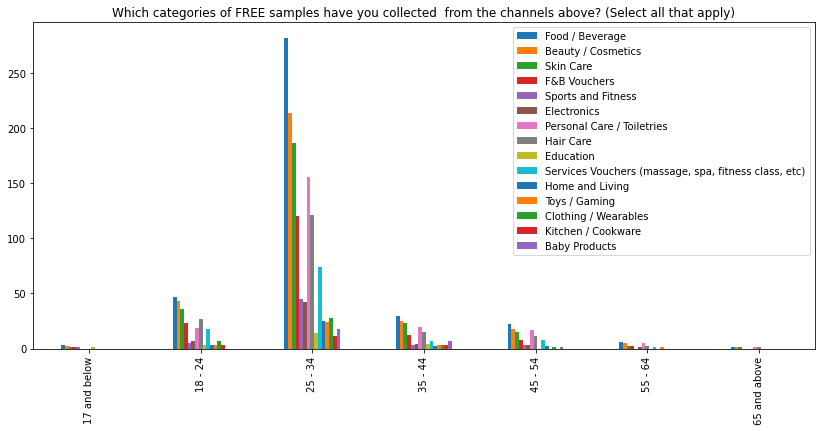

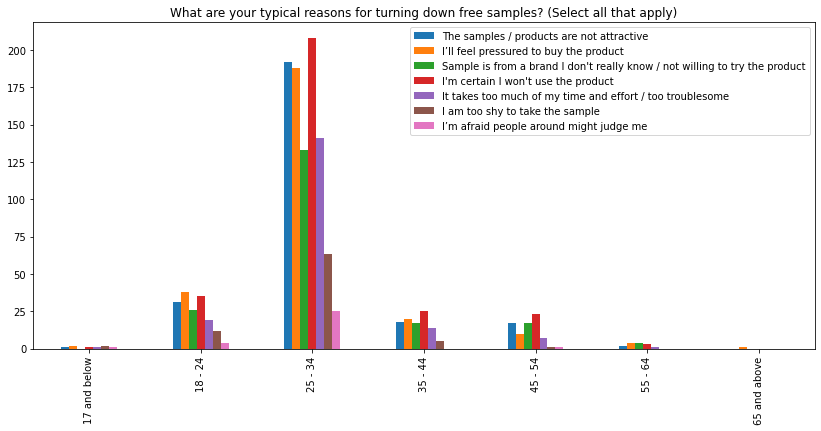

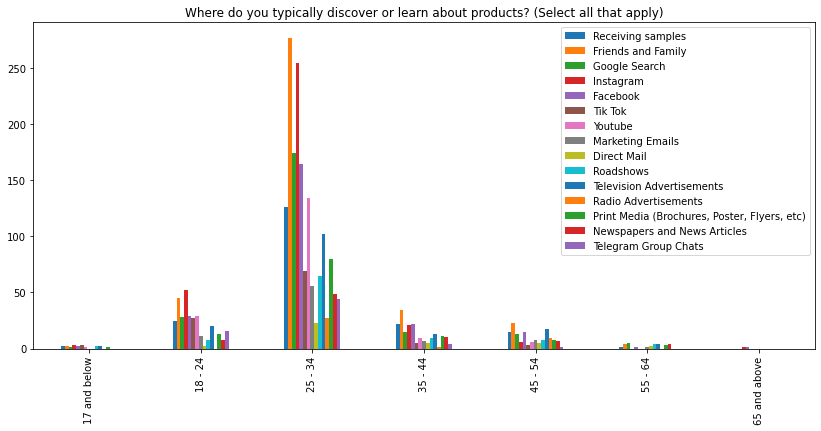

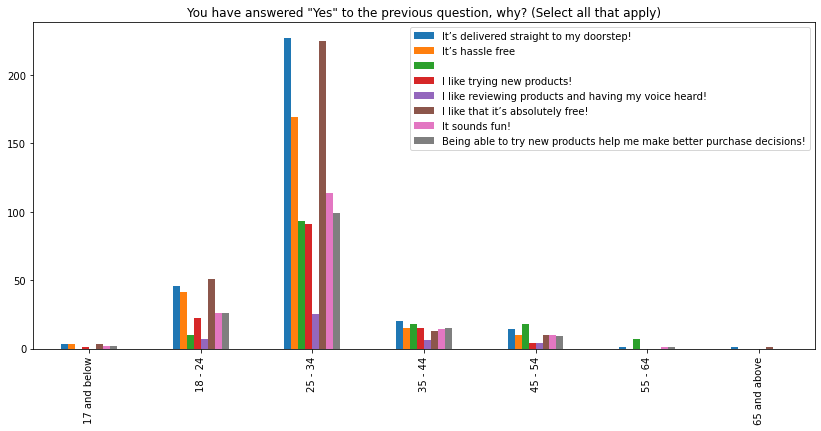

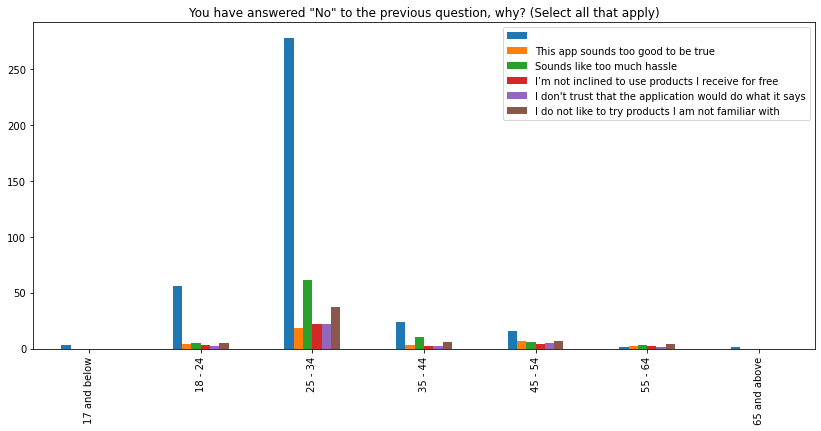

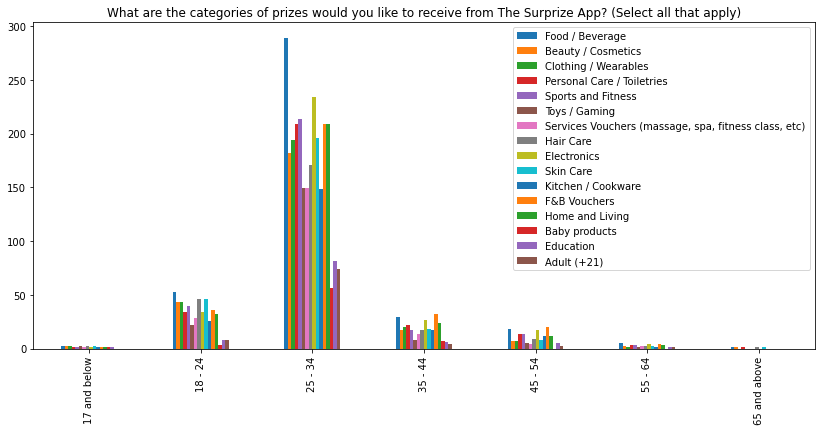

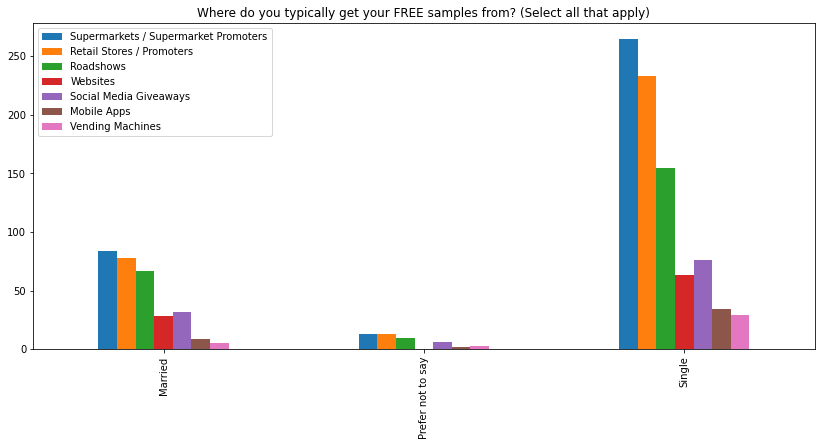

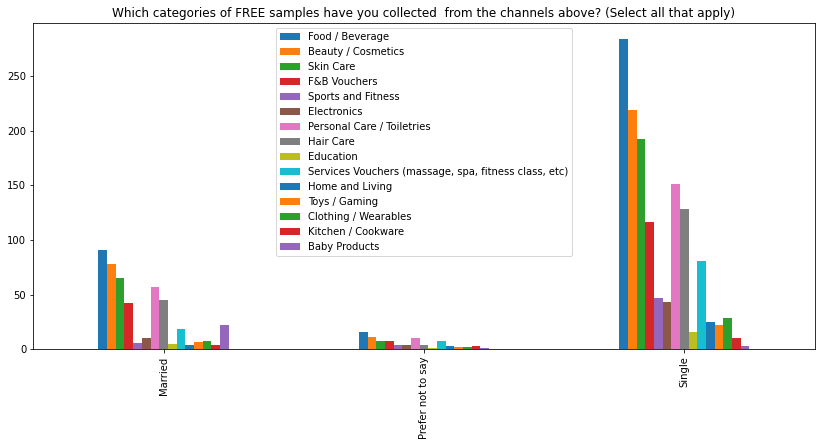

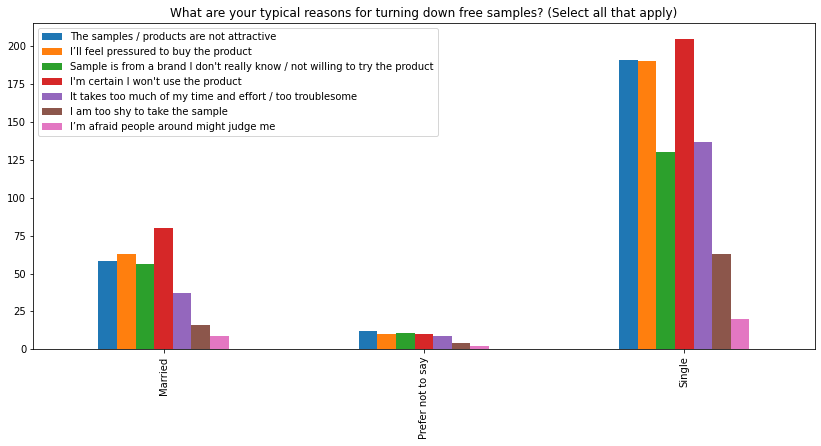

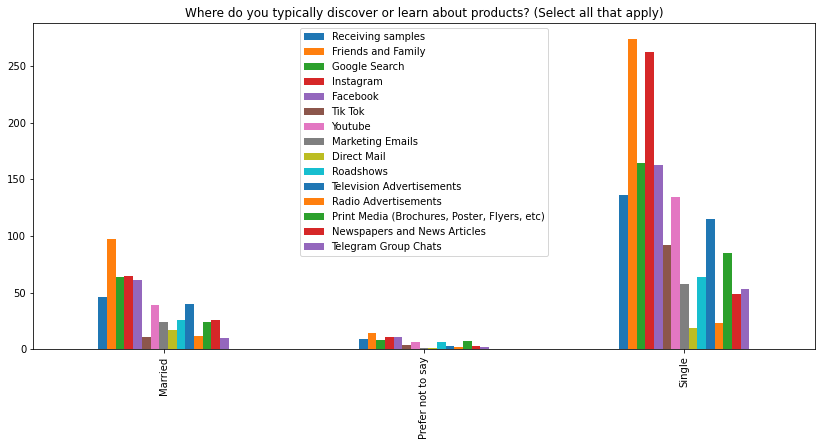

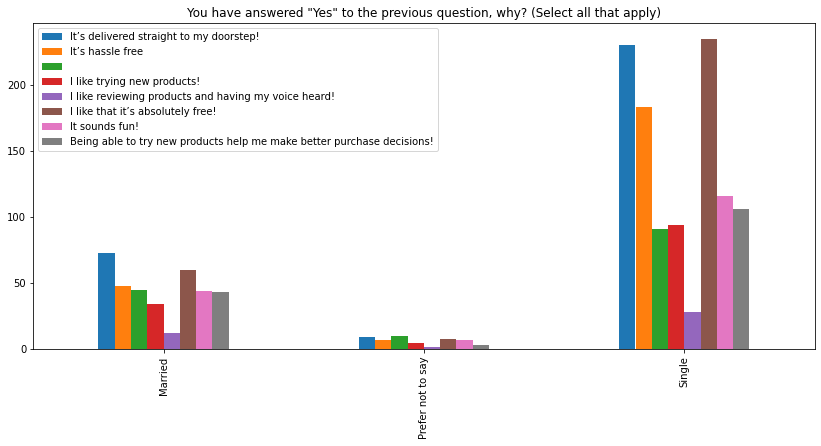

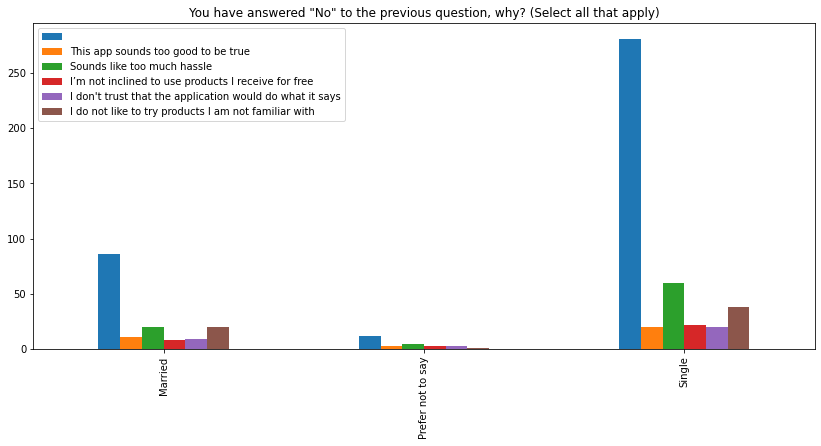

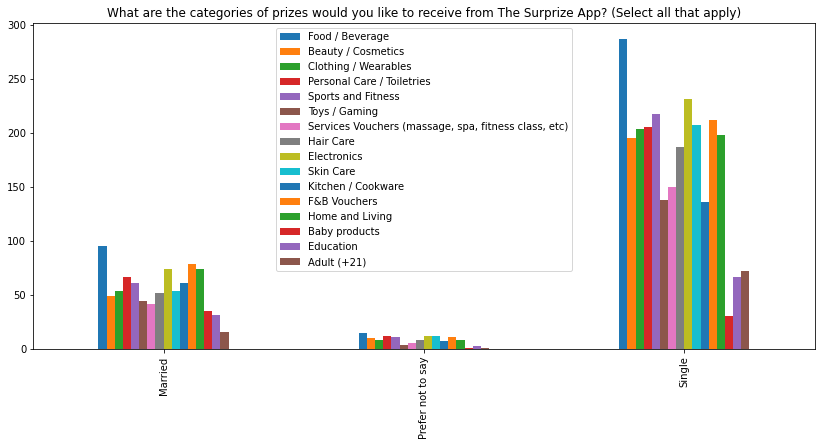

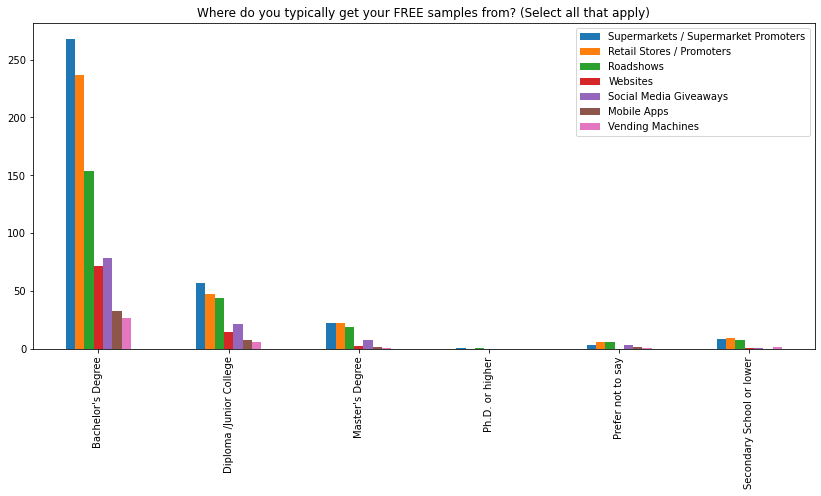

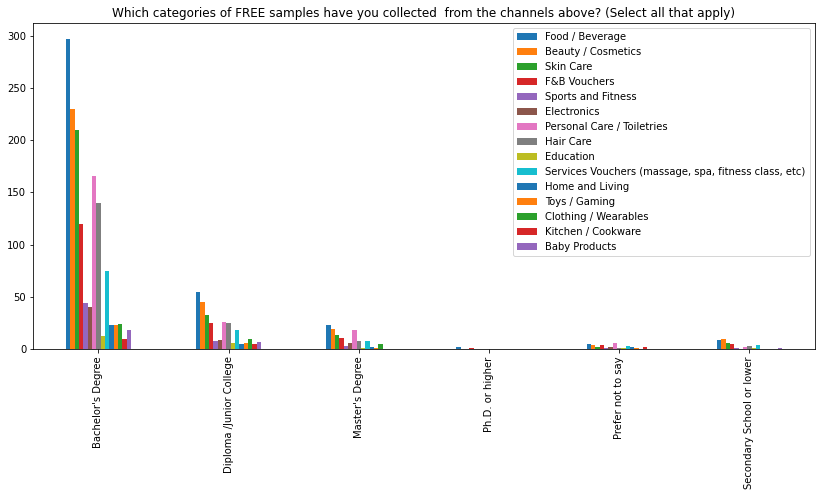

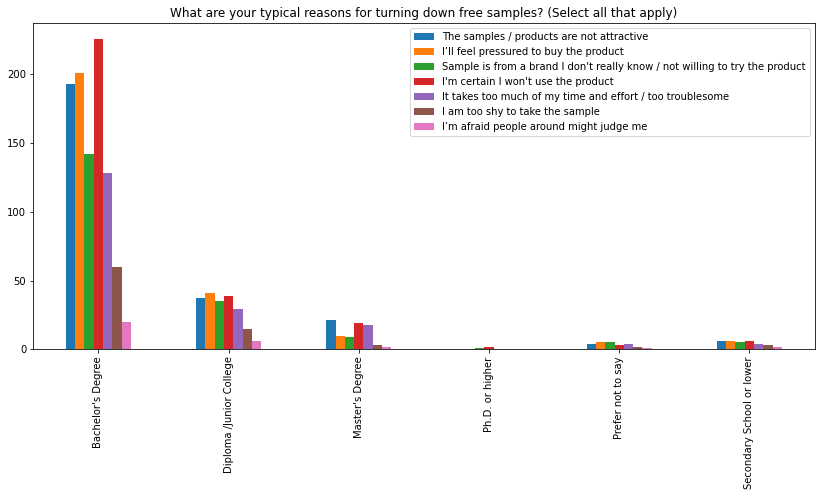

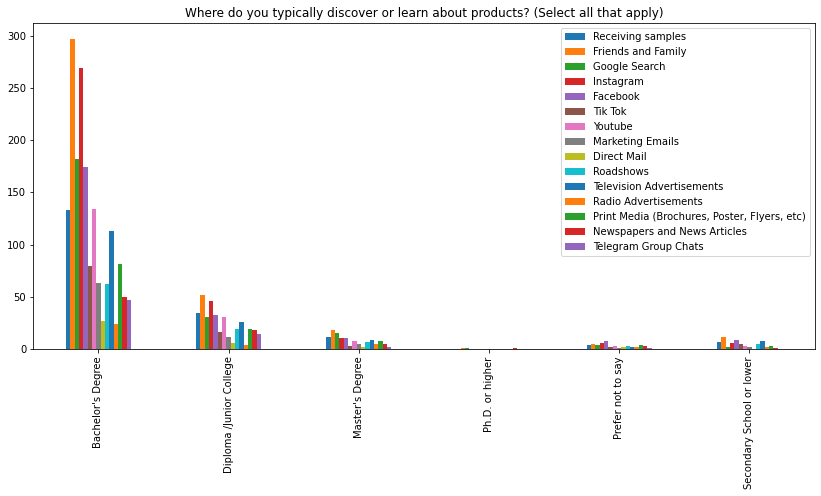

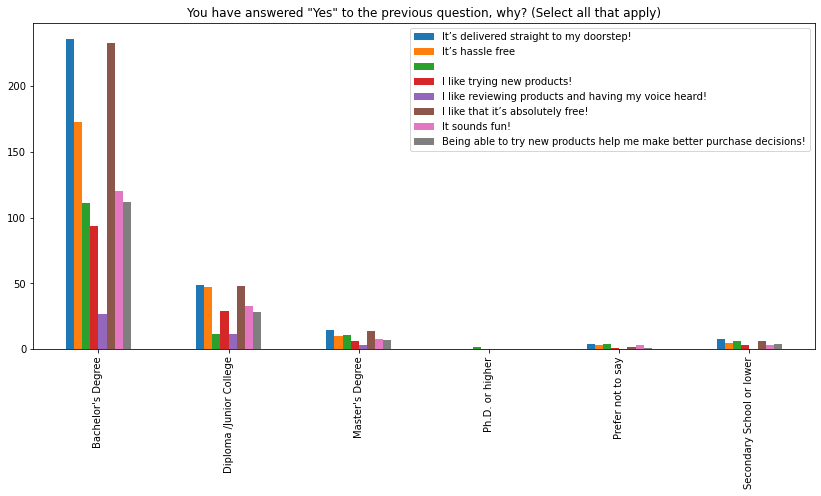

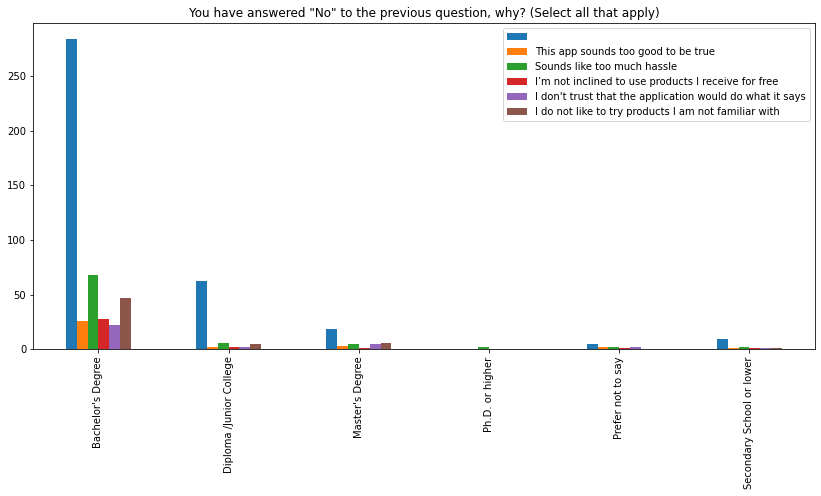

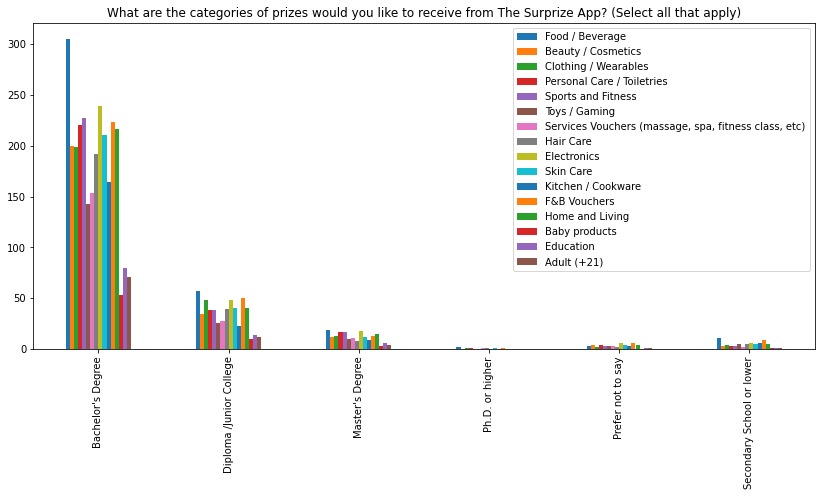

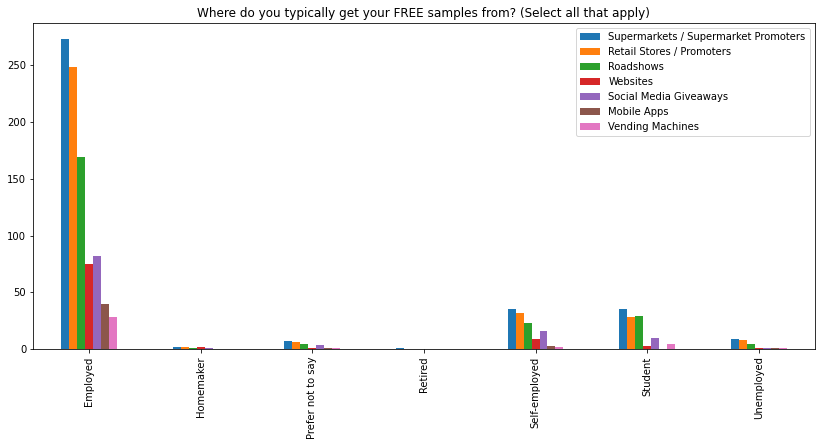

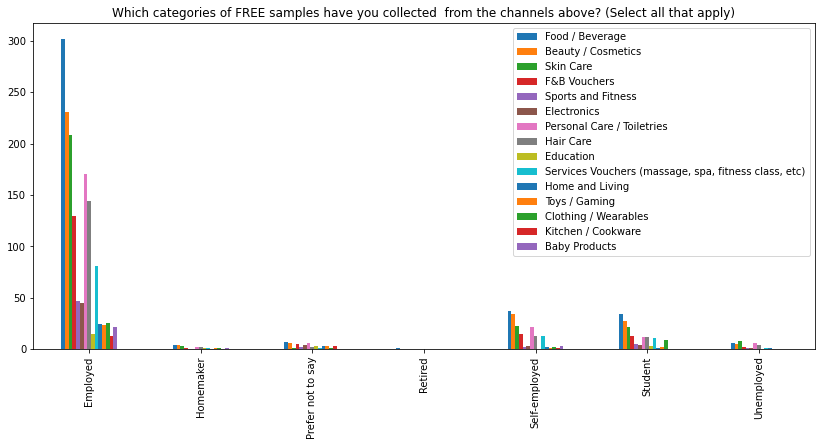

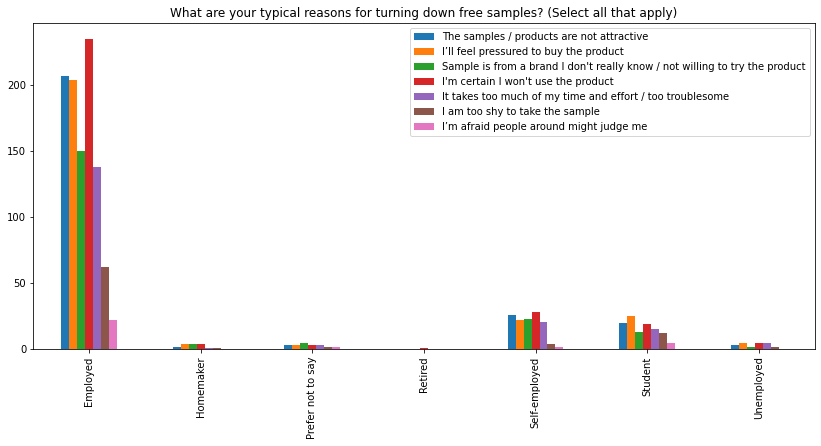

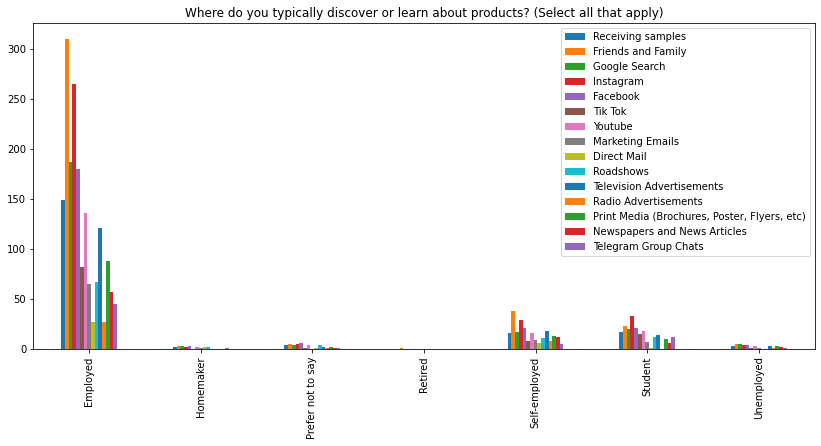

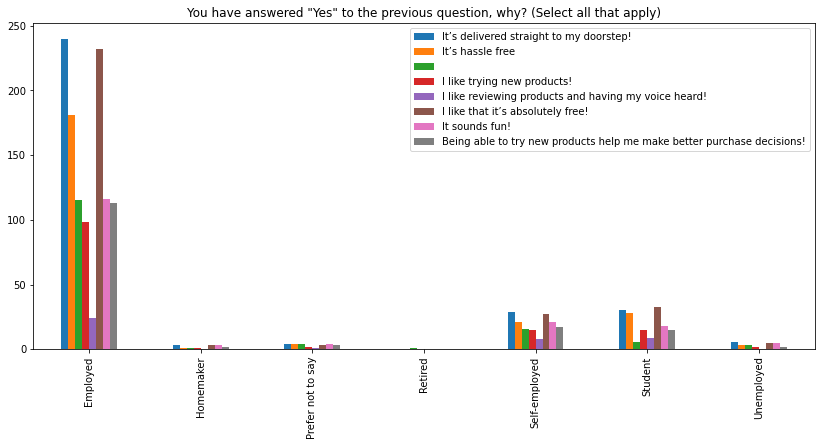

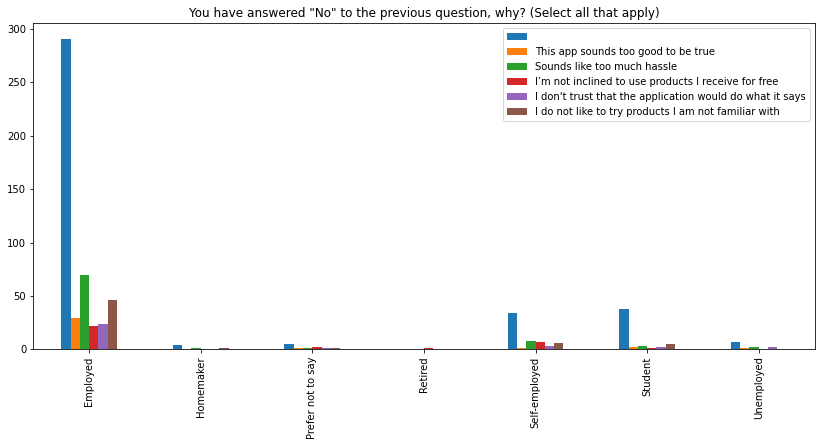

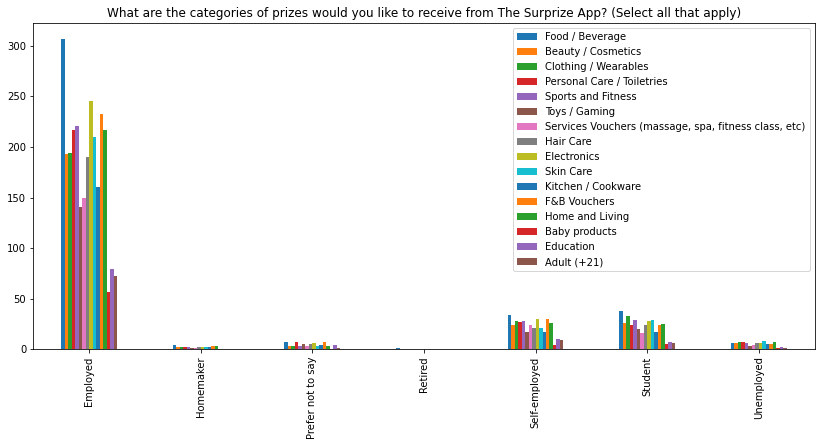

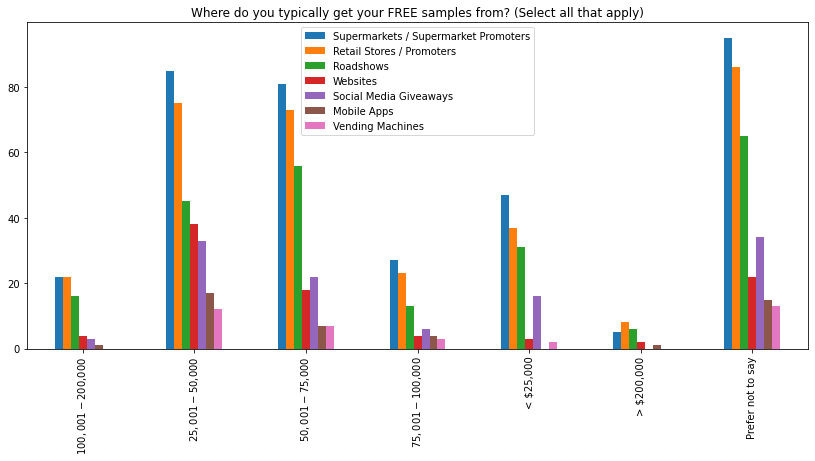

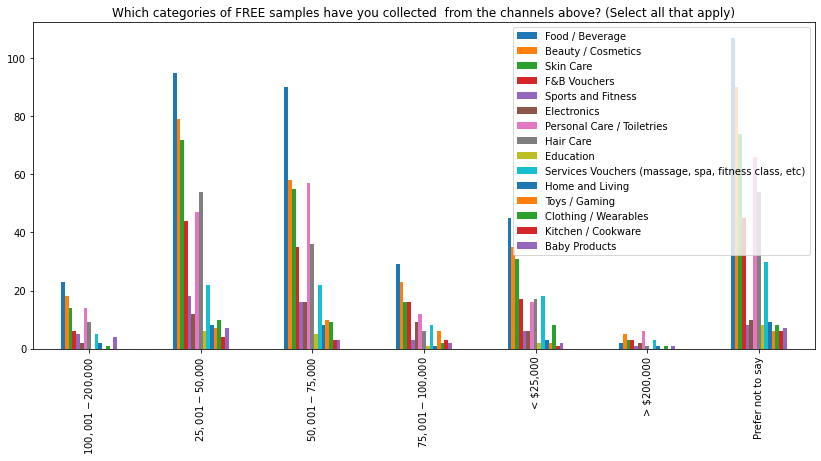

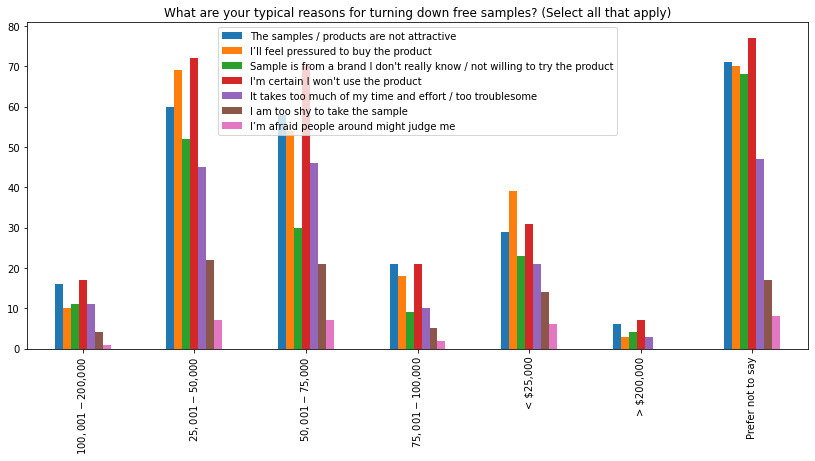

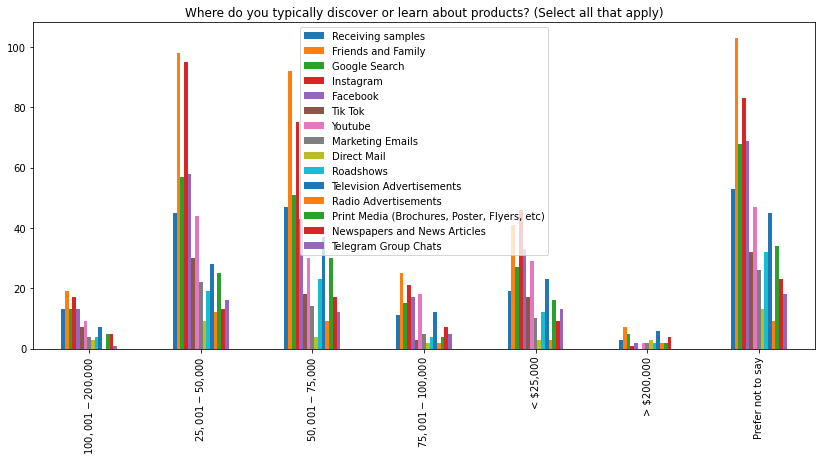

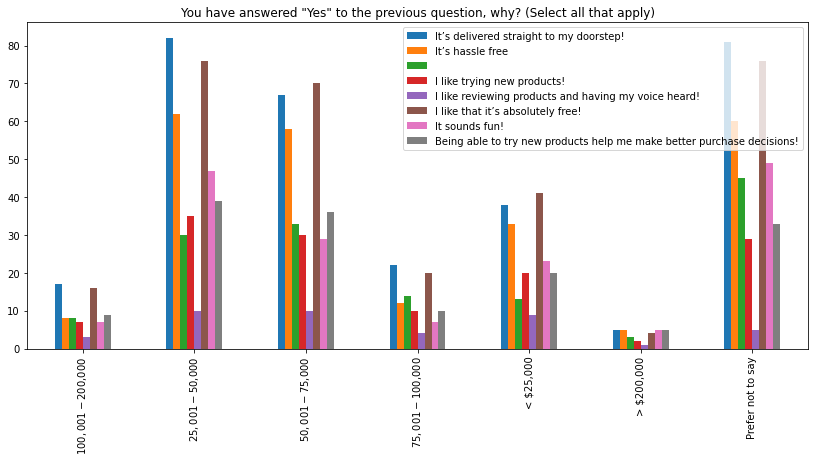

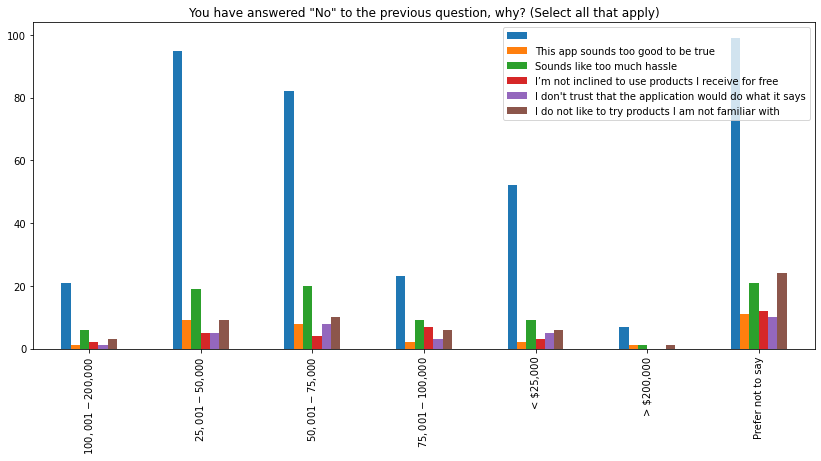

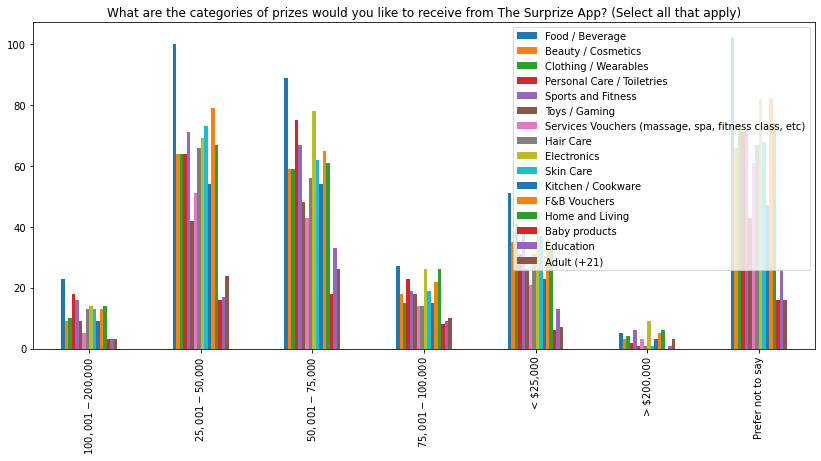

In [26]:
number = 1
for split_on in split_criteria:
#     split_on = "How young are you?"

    for number in range(7):
        qns_type = multichoice_short[number]
        plot_df = pd.DataFrame()
        for entry in sorted(list(df[split_on].unique())):
            df_temp = df.loc[df[split_on]==entry] #all entries in the selected criterion
            series = pd.Series([df_temp[col].sum() for col in df_temp.columns if qns_type in col],
                            [col.split(':')[1][1:] for col in df_temp.columns if qns_type in col],
                           name=entry)
            plot_df = pd.concat([plot_df, series], axis=1)
        plot_df.T.plot(kind='bar',figsize=(14,6),title=multichoice_cols[number])

        plt.show()

In [31]:
df.head(1)

,Timestamp,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,I recommend products to my friends.,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,How long are you willing to wait for the Prize to be delivered to your home?,"Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?","In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?",Name,Gender,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?,Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :),Any questions or suggestions for us? (Give us your wildest ideas / comments),Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articl

In [131]:
non_impt_columns = [
    'How long are you willing to wait for the Prize to be delivered to your home?',
    'Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?',
    'In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?',
    'I recommend products to my friends.'
]
identity_columns = [
    'Name',
    'Gender',
    'Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :)',
    'Any questions or suggestions for us? (Give us your wildest ideas / comments)'
]
demographic_columns = [
    'How young are you?',
    'What is your marital status?',
    'What level of education have you obtained?',
    'What is your current employment status?',
    'What is your annual income?'
]

In [132]:
data_df = df.drop(columns=non_impt_columns+identity_columns)

In [133]:
data_df.shape

(525, 90)

In [134]:
data_df.head(2)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you learn about products: Telegram Group Chats,Why use Surprize: It’s delivered straight to my doorstep!,Why use Surprize: It’s hassle free,Why use Surprize:,Why use Surprize: I like trying new products!,Why use Surprize: I like reviewing products and having my voice heard!,Why use Surprize: I like that it’s absolutely free!,Why use Surprize: It sounds fun!,Why use Surprize: Being able to try new products help me make better purchase decisions!,Why not use Surprize:,Why not use Surprize: This app sounds too good to be true,Why not use Surprize: Sounds like too much hassle,Why not use Surprize: I’m not inclined to use products I receive for free,Why not use Surprize: 

In [135]:
demo_df = data_df[demographic_columns]
demo_df

,How young are you?,What is your marital status?,What level of education have you obtained?,What is your current employment status?,What is your annual income?
0,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000"
1,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000"
2,18 - 24,Single,Diploma /Junior College,Student,"< $25,000"
3,18 - 24,Single,Bachelor's Degree,Employed,"$75,001 - $100,000"
4,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000"
5,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000"
6,25 - 34,Single,Bachelor's Degree,Employed,Prefer not to say
7,18 - 24,Single,Bachelor's Degree,Employed,"$25,001 - $50,000"
8,25 - 34,Single,Bachelor's Degree,Employed,Prefer not to say
9,25 - 34,Single,Bachelor's Degree,Employed,"$50,001 - $75,000"


In [136]:
data_df = pd.get_dummies(data_df, columns = demographic_columns)

In [137]:
data_df.head(1)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you learn about products: Telegram Group Chats,Why use Surprize: It’s delivered straight to my doorstep!,Why use Surprize: It’s hassle free,Why use Surprize:,Why use Surprize: I like trying new products!,Why use Surprize: I like reviewing products and having my voice heard!,Why use Surprize: I like that it’s absolutely free!,Why use Surprize: It sounds fun!,Why use Surprize: Being able to try new products help me make better purchase decisions!,Why not use Surprize:,Why not use Surprize: This app sounds too good to be true,Why not use Surprize: Sounds like too much hassle,Why not use Surprize: I’m not inclined to use products I receive for free,Why not use Surprize: I don't trust that the application would do what it says,Why not use Surprize: I do not like to try products I am not familiar with,What kinds of prizes: Food 

In [138]:
data_df['Will you use this app, based on the description above?'].unique()

array(['Yes', 'No'], dtype=object)

In [139]:
data_df['Will you be willing to travel to collect your Prize?'].unique()

array(['No', 'Yes'], dtype=object)

In [140]:
data_df['Will you be willing to travel to collect your Prize?'] = data_df['Will you be willing to travel to collect your Prize?'].apply(lambda x:
                                                                                                                                       1 if x=='Yes' else 0)
data_df['Will you use this app, based on the description above?'] = data_df['Will you use this app, based on the description above?'].apply(lambda x:
                                                                                                                                       1 if x=='Yes' else 0)

In [156]:
data_df.to_csv('data_cleaned.csv',index=False)  

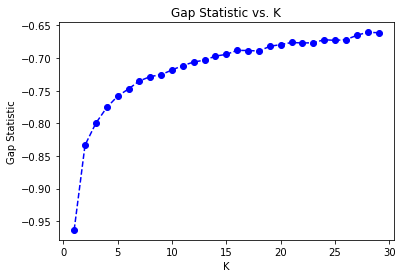

In [144]:
from sklearn.cluster import KMeans
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(data_df, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

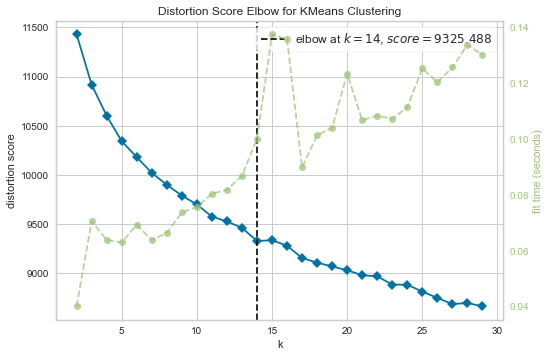

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(data_df)        # Fit data to visualizer
visualizer.show()    

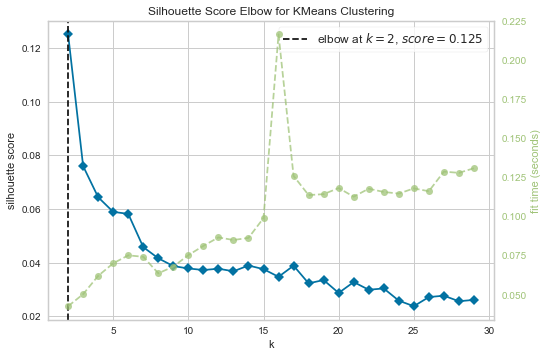

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [147]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(data_df)        # Fit the data to the visualizer
visualizer.show() 

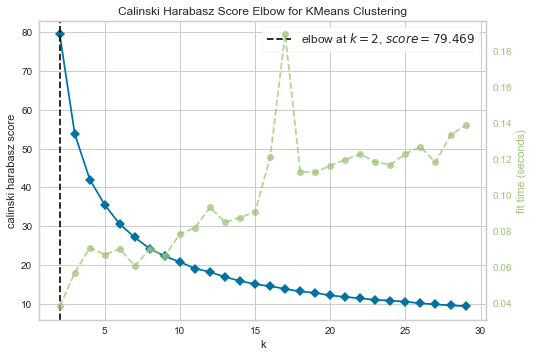

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [148]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(data_df)        # Fit the data to the visualizer
visualizer.show()   

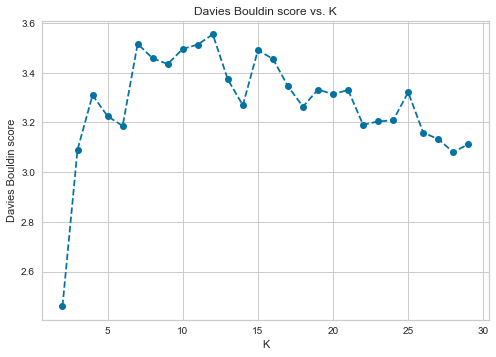

In [151]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data_df)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data_df, model)
    
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(data_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

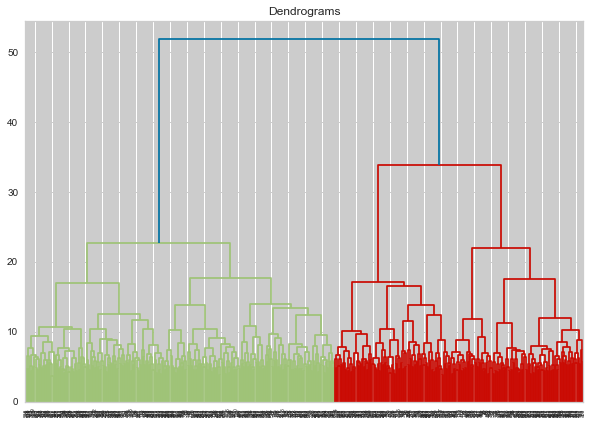

In [152]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_df, method='ward'))

In [154]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(data_df)
        score.append((cov,n_comp,gmm.bic(data_df)))
score

[('spherical', 1, 80112.30026395789),
 ('spherical', 2, 72987.73307701426),
 ('spherical', 3, 71376.4888112909),
 ('spherical', 4, 70568.5296875251),
 ('spherical', 5, 70070.03229198739),
 ('spherical', 6, 70096.20336332734),
 ('spherical', 7, 70045.07257627053),
 ('spherical', 8, 69950.59804299573),
 ('spherical', 9, 69977.96252478527),
 ('spherical', 10, 70314.3290405708),
 ('spherical', 11, 70948.0689016849),
 ('spherical', 12, 70870.95231151866),
 ('spherical', 13, 70924.05560986846),
 ('spherical', 14, 71255.1699647649),
 ('spherical', 15, 72117.18881912761),
 ('spherical', 16, 71853.54925232606),
 ('spherical', 17, 71293.84368531485),
 ('spherical', 18, 73117.92044490723),
 ('spherical', 19, 72989.44334817553),
 ('spherical', 20, 73845.9188468402),
 ('spherical', 21, 74408.48568801834),
 ('spherical', 22, 75012.31248074837),
 ('spherical', 23, 75175.88778664266),
 ('spherical', 24, 74436.76575854229),
 ('spherical', 25, 76058.04731481922),
 ('spherical', 26, 76962.11678346366),
 

2, 3 or 8 clusters